In [ ]:
import numpy as np
import sklearn
from sklearn import datasets
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 30)
pd.pandas.set_option('display.max_columns', None)

#Loading Dataset

In [ ]:
df_type = pd.read_csv('data_type.csv', sep=';')
variable_types = dict(zip(df_type.VarName, df_type.Type))
df = pd.read_csv('data_train_insurance.csv', sep=';', dtype=variable_types, na_values='?')

#Exploration of dataset

In [ ]:
df.shape

(9983, 40)

In [ ]:
df.sample(30)

,Id,Response_Market_Index,PROD_Formula,PER_sex,PER_Sex_Second_Driver,VEH_Actual_Value,CLA_HISTORY,CLA_HISTORY_1Y,CLA_HISTORY_3Y,CLA_BM_TPL_DECLARED,BEH_Mileage,PER_KIDS_ON_BOARD_ID,VEH_Number_of_doors,VEH_Top_Speed,BEH_Number_Year_Insured,VEH_TransmissionId,PER_Age_Main_Driver,PER_License_Age_Main_Driver,PER_License_Age_Second_Driver,PER_Matrimonial_Status,VEH_Age,VEH_Injection_Mode,VEH_fuel_type,BEH_vehicule_usage,VEH_Drive_type,VEH_Body,VEH_Segment,PER_Parking_Type,CLA_BM,VEH_engine_HP,VEH_pw_proportion,VEH_High_Risk_Vehicle,PER_previous_insurer,PER_Is_second_driver,PER_Age_oldest_child,PER_Second_Driver_Age,PER_Insured_Before,VEH_Weight,GEO_Lat,GEO_Long
7279,1704328,359.00,FULL,1,0,7300.0,2.0,1.0,2.0,2.0,14.0,2,5.0,195.0,6.0,7,30.0,10.0,-1.0,2,13.0,389999,2,1,50001,9,30003,2,6.0,115.0,59.0,2,27,1,1.0,-1.0,1,1445.0,-1.417176,0.117853
9380,1711431,529.00,BASIC,1,0,62357.0,1.0,1.0,1.0,-1.0,13.0,2,4.0,180.0,-1.0,7,30.0,10.0,-1.0,2,0.0,380008,2,1,50001,1,30003,2,0.0,90.0,51.0,2,-99,1,2.0,-1.0,4,1300.0,0.492424,-1.731147
7115,1703838,409.00,FULL,2,1,17440.0,1.0,1.0,1.0,1.0,15.0,3,5.0,190.0,10.0,7,52.0,34.0,NaN,NaN,6.0,389999,2,1,50001,9,30003,2,10.0,115.0,60.0,2,16,2,-99.0,51.0,2,1426.0,-0.874176,-1.064447
9591,1711931,300.19,FULL,1,1,6542.0,1.0,1.0,1.0,1.0,13.0,3,5.0,162.0,10.0,7,55.0,30.0,6.0,2,11.0,389999,2,1,50001,10,30002,2,10.0,65.0,50.0,2,16,2,-99.0,26.0,1,960.0,0.892424,1.368853
4190,1690796,823.00,BASIC,1,0,3300.0,1.0,1.0,1.0,7.0,13.0,3,NaN,140.0,0.0,7,23.0,5.0,NaN,NaN,13.0,389999,1,1,50001,10,30001,2,0.0,41.0,38.0,1,18,1,-99.0,-1.0,1,805.0,-0.774176,-2.097747
5683,1698690,354.45,BASIC,1,0,14310.0,1.0,1.0,1.0,1.0,14.0,3,5.0,202.0,10.0,7,50.0,33.0,-1.0,2,8.0,389999,2,1,50001,9,30003,2,10.0,150.0,68.0,2,27,1,22.0,-1.0,2,1628.0,0.492424,-2.647747
1736,1673974,476.87,FULL,1,0,8068.0,1.0,1.0,1.0,1.0,14.0,1,5.0,185.0,10.0,7,30.0,12.0,-1.0,2,10.0,NaN,2,1,50001,10,30005,3,10.0,100.0,54.0,2,27,1,12.0,-1.0,2,1390.0,1.959124,0.968853
4097,1690491,383.23,FULL,2,0,15000.0,1.0,1.0,1.0,1.0,13.0,3,3.0,168.0,10.0,7,25.0,6.0,-1.0,1,6.0,380002,1,1,50001,10,30002,2,6.0,80.0,54.0,2,15,1,-99.0,-1.0,2,1100.0,-1.374176,0.052253
8875,1709889,299.00,FULL,2,0,29783.0,1.0,1.0,1.0,1.0,13.0,1,5.0,192.0,8.0,7,28.0,9.0,-1.0,2,4.0,380009,2,1,50001,10,30003,3,8.0,105.0,56.0,2,17,1,1.0,-1.0,1,1380.0,0.909124,0.018853
9368,1711405,1743.53,BASIC,1,0,16432.0,1.0,1.0,1.0,-1.0,13.0,3,5.0,200.0,-1.0,7,18.0,0.0,-1.0,1,9.0,389999,1,1,50002,10,30003,2,0.0,116.0,67.0,2,-99,1,-99.0,-1.0,4,1280.0,-1.657576,0.902253


In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9983 entries, 0 to 9982
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Id                             9983 non-null   object 
 1   Response_Market_Index          9983 non-null   float64
 2   PROD_Formula                   9983 non-null   object 
 3   PER_sex                        9983 non-null   object 
 4   PER_Sex_Second_Driver          9983 non-null   object 
 5   VEH_Actual_Value               9983 non-null   float64
 6   CLA_HISTORY                    9933 non-null   float64
 7   CLA_HISTORY_1Y                 9933 non-null   float64
 8   CLA_HISTORY_3Y                 9933 non-null   float64
 9   CLA_BM_TPL_DECLARED            9933 non-null   float64
 10  BEH_Mileage                    9933 non-null   float64
 11  PER_KIDS_ON_BOARD_ID           9933 non-null   object 
 12  VEH_Number_of_doors            9217 non-null   f

In [ ]:
df.convert_dtypes().dtypes

Id                        string
Response_Market_Index    Float64
PROD_Formula              string
PER_sex                   string
PER_Sex_Second_Driver     string
                          ...   
PER_Second_Driver_Age      Int64
PER_Insured_Before        string
VEH_Weight                 Int64
GEO_Lat                  Float64
GEO_Long                 Float64
Length: 40, dtype: object

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9983 entries, 0 to 9982
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Id                             9983 non-null   object 
 1   Response_Market_Index          9983 non-null   float64
 2   PROD_Formula                   9983 non-null   object 
 3   PER_sex                        9983 non-null   object 
 4   PER_Sex_Second_Driver          9983 non-null   object 
 5   VEH_Actual_Value               9983 non-null   float64
 6   CLA_HISTORY                    9933 non-null   float64
 7   CLA_HISTORY_1Y                 9933 non-null   float64
 8   CLA_HISTORY_3Y                 9933 non-null   float64
 9   CLA_BM_TPL_DECLARED            9933 non-null   float64
 10  BEH_Mileage                    9933 non-null   float64
 11  PER_KIDS_ON_BOARD_ID           9933 non-null   object 
 12  VEH_Number_of_doors            9217 non-null   f

#Analysis of missing values

In [ ]:
a = df.isnull().sum(axis=0).reset_index()
a.columns = ['column', 'null_values']
a.sort_values(by='null_values', ascending=False)

,column,null_values
21,VEH_Injection_Mode,2563
18,PER_License_Age_Second_Driver,1052
19,PER_Matrimonial_Status,1052
12,VEH_Number_of_doors,766
24,VEH_Drive_type,50
...,...,...
5,VEH_Actual_Value,0
4,PER_Sex_Second_Driver,0
3,PER_sex,0
2,PROD_Formula,0


<AxesSubplot:>

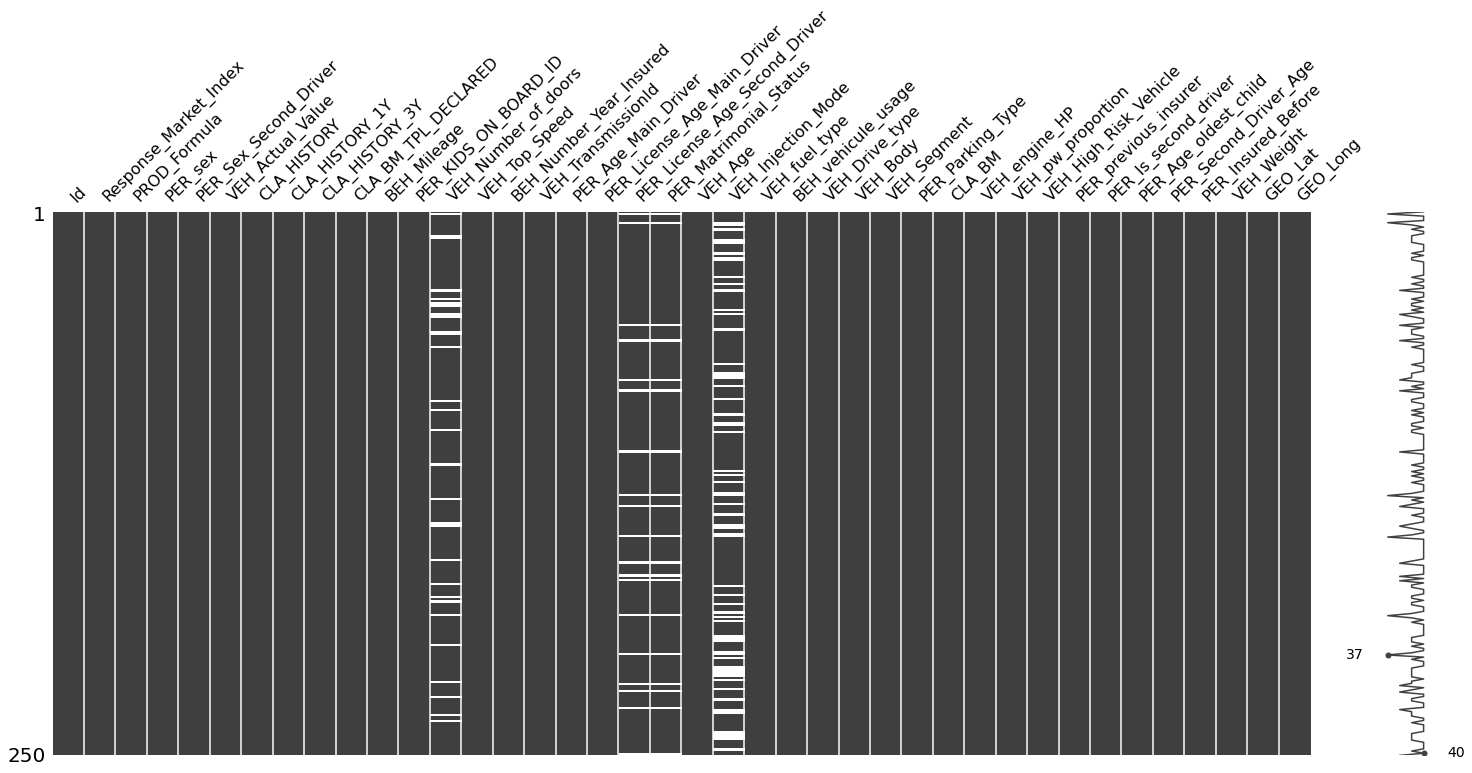

In [ ]:
import missingno as msno
%matplotlib inline
msno.matrix(df.sample(250))

<AxesSubplot:>

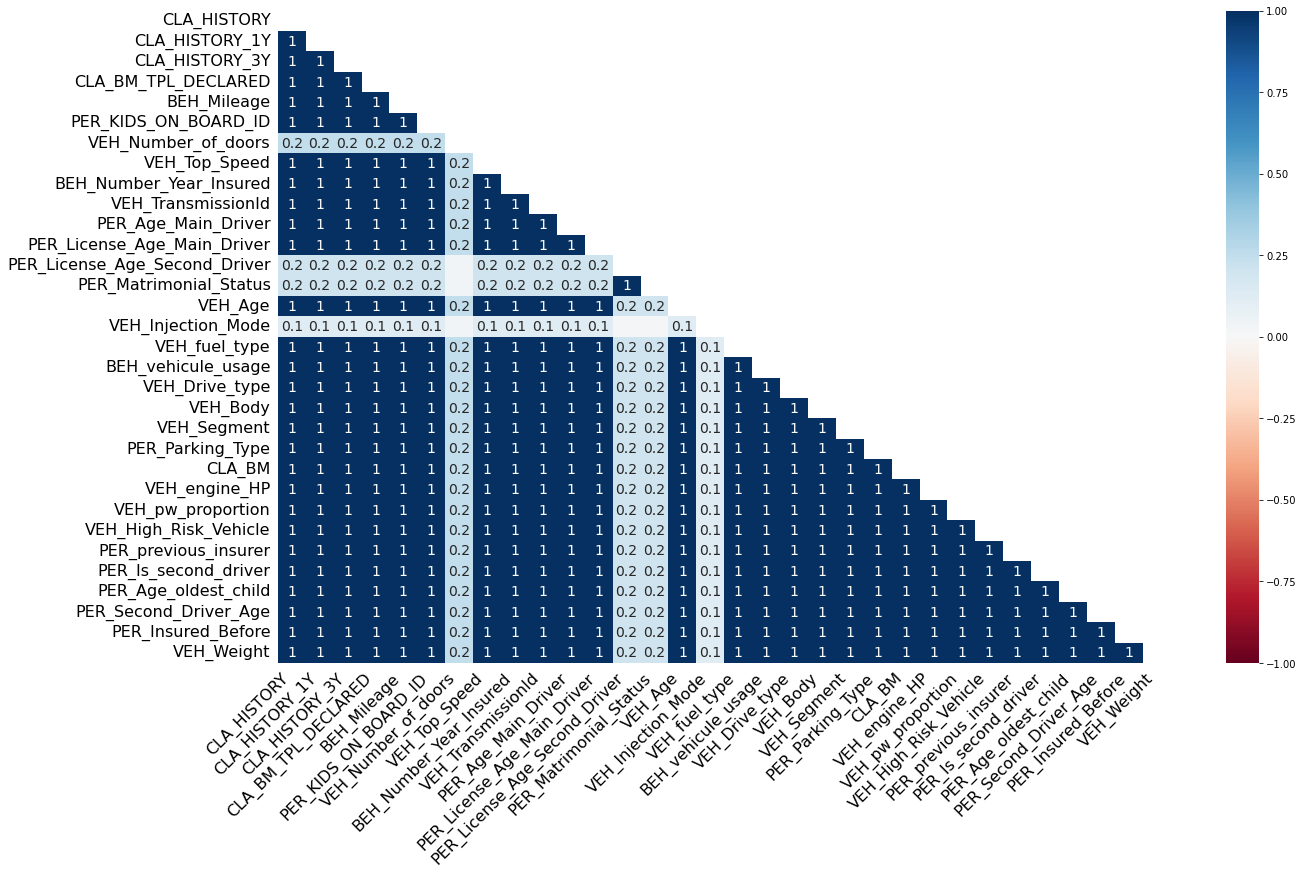

In [ ]:
msno.heatmap(df)

<AxesSubplot:>

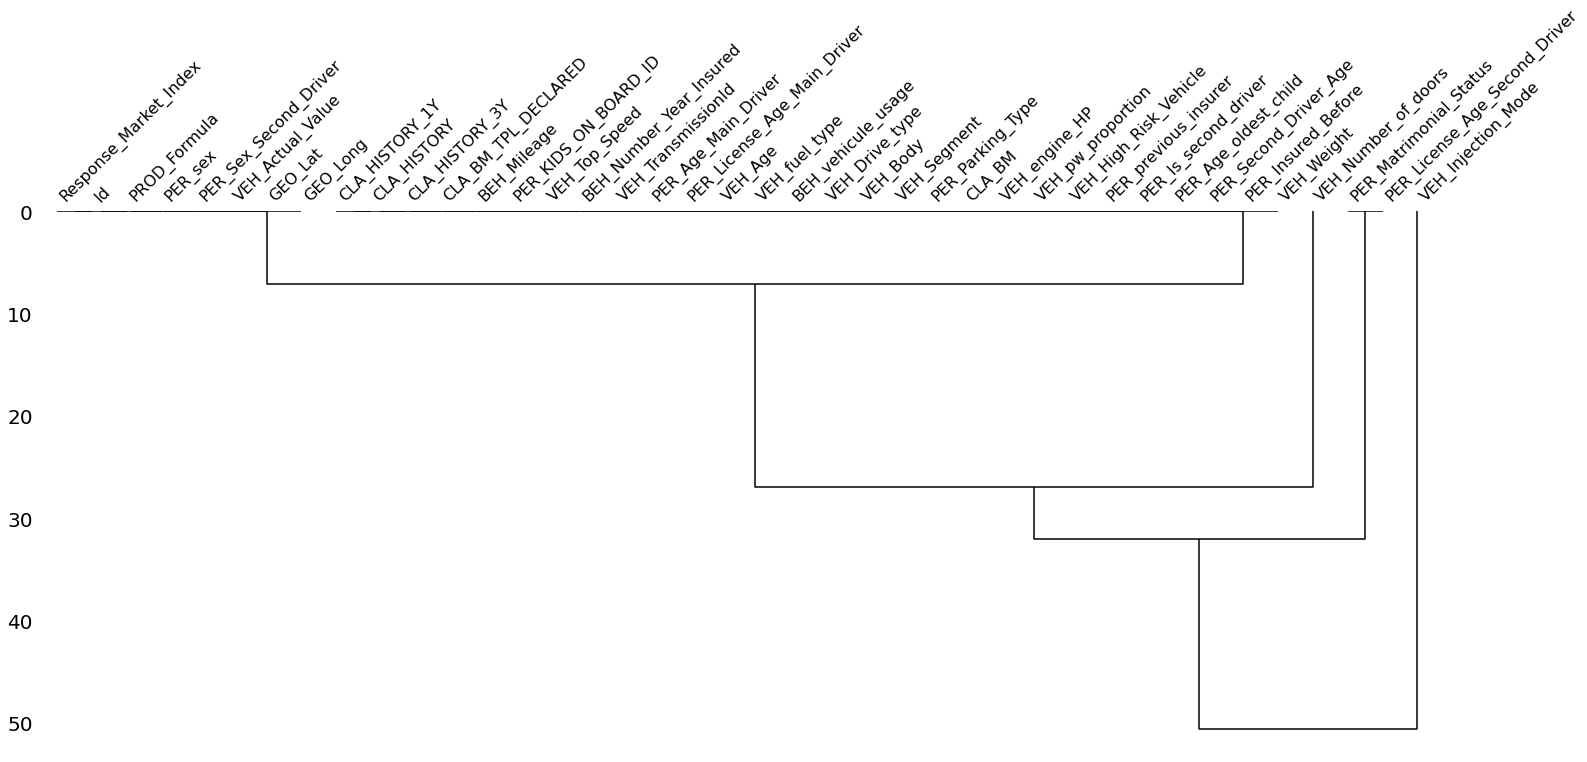

In [ ]:
msno.dendrogram(df)

In [ ]:
df['PER_Sex_Second_Driver'].value_counts()

0    8402
2    1082
1     499
Name: PER_Sex_Second_Driver, dtype: int64

In [ ]:
df = df.drop('PER_Sex_Second_Driver', axis=1) #trop de valeurs manquantes

In [ ]:
df['VEH_Number_of_doors'].value_counts()

5.0    6830
4.0    1358
3.0     873
2.0     156
Name: VEH_Number_of_doors, dtype: int64

In [ ]:
df['VEH_Number_of_doors'] = df['VEH_Number_of_doors'].fillna(5.0)

In [ ]:
df['PER_License_Age_Main_Driver'].value_counts()

6.0     438
15.0    414
7.0     413
9.0     391
13.0    386
       ... 
59.0      3
55.0      3
58.0      2
52.0      2
56.0      2
Name: PER_License_Age_Main_Driver, Length: 60, dtype: int64

In [ ]:
df['PER_License_Age_Main_Driver'].describe()

count    9933.000000
mean       16.939495
std        11.614645
min         0.000000
25%         8.000000
50%        15.000000
75%        24.000000
max        59.000000
Name: PER_License_Age_Main_Driver, dtype: float64

In [ ]:
df['PER_License_Age_Main_Driver'] = df['PER_License_Age_Main_Driver'].fillna(17.0)

In [ ]:
df['PER_Age_oldest_child'].value_counts() # on peut considérer -99 comme une donnée manquante. Il y a beaucoup trop de données manquantes pour les remplacer par la moyenne par exemple donc nous allons supprimer la ligne

-99.0    5042
 1.0      427
 2.0      324
 12.0     318
 4.0      269
 8.0      261
 6.0      258
 5.0      241
 3.0      239
 23.0     209
 25.0     192
 7.0      184
 10.0     174
 22.0     173
 24.0     170
 18.0     152
 9.0      149
 13.0     143
 21.0     141
 14.0     141
 20.0     136
 15.0     132
 19.0     131
 16.0     125
 17.0     100
 11.0      99
 26.0       2
 27.0       1
Name: PER_Age_oldest_child, dtype: int64

In [ ]:
df = df.drop('PER_Age_oldest_child', axis=1)

In [ ]:
df['PER_Second_Driver_Age'].value_counts() # de même ici trop de valeurs manquantes (-1)

-1.0     8365
 35.0     106
 31.0     100
 28.0      77
 25.0      76
         ... 
 66.0       2
 59.0       2
 47.0       1
 67.0       1
 65.0       1
Name: PER_Second_Driver_Age, Length: 51, dtype: int64

In [ ]:
df = df.drop('PER_Second_Driver_Age', axis=1)

In [ ]:
df['PER_License_Age_Second_Driver'].value_counts()

-1.0     7514
 3.0      110
 6.0       98
 0.0       91
 15.0      82
         ... 
 32.0       5
 29.0       5
 40.0       5
 28.0       4
 47.0       1
Name: PER_License_Age_Second_Driver, Length: 41, dtype: int64

In [ ]:
df = df.drop('PER_License_Age_Second_Driver', axis=1) #trop de valeurs manquantes

In [ ]:
df['PER_Matrimonial_Status'].value_counts() # je pense que 5 et 6 peuvent correspondre à veuf ou autre chose mais trop de valeurs manquantes

2    5826
1    2568
5     401
6     136
Name: PER_Matrimonial_Status, dtype: int64

In [ ]:
df['VEH_Injection_Mode'].value_counts()

389999    3719
380002    1792
380008    1490
380009     265
380001     154
Name: VEH_Injection_Mode, dtype: int64

In [ ]:
df = df.drop('VEH_Injection_Mode', axis=1) # il nous manque 2500 données soit plus de 25% de nos lignes totales

In [ ]:
df['CLA_BM_TPL_DECLARED'].value_counts()

 1.0     6649
-1.0     1139
 7.0      700
 2.0      441
 3.0      257
 6.0      235
 4.0      212
 5.0      212
 11.0      35
 12.0      34
 9.0       10
 10.0       9
Name: CLA_BM_TPL_DECLARED, dtype: int64

In [ ]:
df = df.drop('CLA_BM_TPL_DECLARED', axis=1) # il nous manque 1140 données 

In [ ]:
df['BEH_vehicule_usage'].value_counts()

1    9933
Name: BEH_vehicule_usage, dtype: int64

In [ ]:
df = df.drop('BEH_vehicule_usage', axis=1)

In [ ]:
df['PER_previous_insurer'].value_counts()

27     1941
18     1487
-99    1139
7       758
15      751
16      648
2       606
29      525
5       478
21      359
12      326
32      285
6       244
10      237
17      149
Name: PER_previous_insurer, dtype: int64

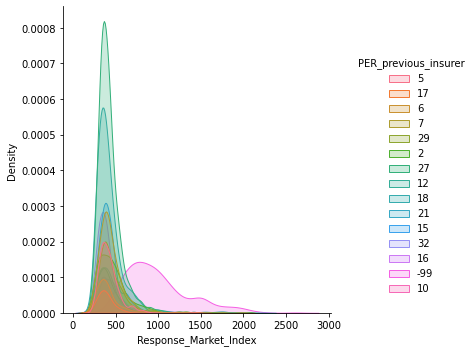

In [ ]:
sn.displot(df, x="Response_Market_Index", hue="PER_previous_insurer", kind="kde", fill=True) #on peut laisser -99 comme catégorie car elle a l'air d'avoir un impact significatif sur la target

In [ ]:
df = df.drop(['Id', 'CLA_HISTORY', 'CLA_HISTORY_1Y', 'CLA_HISTORY_3Y'], axis=1) 

In [ ]:
a = df.isnull().sum(axis=0).reset_index()
a.columns = ['column', 'null_values']
a.sort_values(by='null_values', ascending=False)

,column,null_values
12,PER_Matrimonial_Status,1052
14,VEH_fuel_type,50
22,VEH_High_Risk_Vehicle,50
20,VEH_engine_HP,50
19,CLA_BM,50
18,PER_Parking_Type,50
17,VEH_Segment,50
16,VEH_Body,50
15,VEH_Drive_type,50
23,PER_previous_insurer,50


<AxesSubplot:>

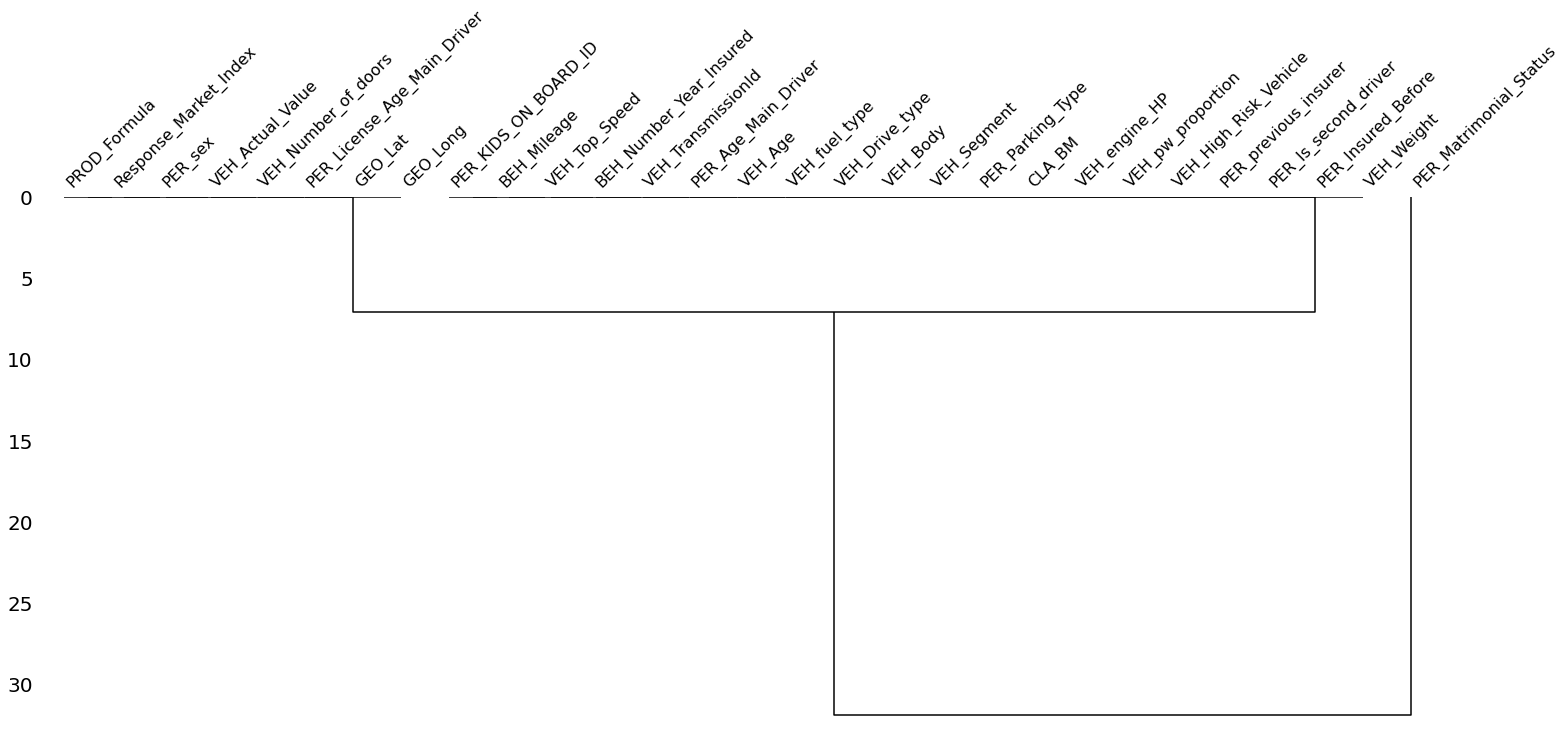

In [ ]:
msno.dendrogram(df) # ici on voit clairement que les 50 données manquantes sont pour les mêmes lignes nous pouvons donc les retirer sans perdre trop d'information

In [ ]:
df = df.dropna() 

In [ ]:
a = df.isnull().sum(axis=0).reset_index()
a.columns = ['column', 'null_values']
a.sort_values(by='null_values', ascending=False)

,column,null_values
0,Response_Market_Index,0
15,VEH_Drive_type,0
27,GEO_Lat,0
26,VEH_Weight,0
25,PER_Insured_Before,0
24,PER_Is_second_driver,0
23,PER_previous_insurer,0
22,VEH_High_Risk_Vehicle,0
21,VEH_pw_proportion,0
20,VEH_engine_HP,0


###Categorial data processing

In [ ]:
df.sample(10)

,Response_Market_Index,PROD_Formula,PER_sex,VEH_Actual_Value,BEH_Mileage,PER_KIDS_ON_BOARD_ID,VEH_Number_of_doors,VEH_Top_Speed,BEH_Number_Year_Insured,VEH_TransmissionId,PER_Age_Main_Driver,PER_License_Age_Main_Driver,PER_Matrimonial_Status,VEH_Age,VEH_fuel_type,VEH_Drive_type,VEH_Body,VEH_Segment,PER_Parking_Type,CLA_BM,VEH_engine_HP,VEH_pw_proportion,VEH_High_Risk_Vehicle,PER_previous_insurer,PER_Is_second_driver,PER_Insured_Before,VEH_Weight,GEO_Lat,GEO_Long
1022,269.00,FULL,1,120800.0,13.0,2,5.0,186.0,10.0,7,60.0,39.0,2,0.0,2,50004,9,30003,2,10.0,140.0,63.0,2,16,1,1,1661.0,2.459124,-2.831147
6127,249.00,FULL,1,22300.0,12.0,1,4.0,150.0,10.0,7,39.0,21.0,2,3.0,2,50001,9,30003,4,10.0,75.0,40.0,1,2,1,2,1407.0,2.359124,-1.214447
78,279.00,FULL,2,14161.0,13.0,1,5.0,180.0,10.0,7,35.0,17.0,2,9.0,2,50001,9,30003,3,10.0,100.0,54.0,2,27,1,1,1393.0,1.209124,-1.081147
4089,363.21,BASIC,1,6800.0,13.0,3,5.0,230.0,10.0,7,79.0,55.0,2,14.0,1,50001,10,30005,2,10.0,205.0,109.0,2,16,1,1,1385.0,-1.774176,3.018853
7111,319.00,FULL,1,24370.0,14.0,1,5.0,179.0,10.0,7,35.0,17.0,2,5.0,2,50001,9,30003,2,10.0,105.0,52.0,2,27,1,2,1498.0,-1.924176,0.018853
3191,329.94,BASIC,1,8366.0,12.0,3,4.0,200.0,7.0,7,47.0,12.0,2,10.0,1,50001,1,30005,2,7.0,131.0,66.0,2,16,1,1,1469.0,-0.640876,-1.981147
5761,328.00,BASIC,1,26952.0,12.0,2,5.0,219.0,6.0,7,29.0,3.0,2,3.0,1,50001,10,30003,1,3.0,150.0,88.0,2,32,1,2,1260.0,1.434124,-1.397747
3252,429.00,FULL,2,13863.0,13.0,2,4.0,156.0,10.0,7,61.0,28.0,2,5.0,2,50001,9,30003,2,10.0,84.0,47.0,1,21,2,2,1330.0,-0.640876,-1.981147
1211,447.00,FULL,1,12250.0,13.0,2,5.0,190.0,10.0,7,51.0,31.0,2,9.0,2,50001,9,30003,2,10.0,110.0,58.0,2,18,2,1,1400.0,-1.874176,1.068853
1021,384.00,BASIC,1,17818.0,13.0,2,5.0,177.0,7.0,8,34.0,9.0,2,9.0,2,50001,9,30003,3,7.0,105.0,51.0,2,2,2,2,1538.0,-0.640876,-1.981147


In [ ]:
df.loc[df['PROD_Formula'] == 'BASIC', 'PROD_Formula'] = str(1)
df.loc[df['PROD_Formula'] == 'FULL', 'PROD_Formula'] = str(2)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df['VEH_Drive_type'].value_counts()

50001    7732
50002     501
50007     394
50003     128
50004      78
59999      59
50006      23
50005      16
Name: VEH_Drive_type, dtype: int64

In [ ]:
df[['PROD_Formula', 'PER_sex', 'PER_KIDS_ON_BOARD_ID', 'VEH_Number_of_doors', 'VEH_TransmissionId', 'VEH_fuel_type', 'VEH_Drive_type', 'VEH_Body', 'VEH_Segment', 'PER_Parking_Type', 'VEH_High_Risk_Vehicle', 'PER_previous_insurer', 'PER_Is_second_driver', 'PER_Insured_Before', 'CLA_BM']] = df[['PROD_Formula', 'PER_sex', 'PER_KIDS_ON_BOARD_ID', 'VEH_Number_of_doors', 'VEH_TransmissionId', 'VEH_fuel_type', 'VEH_Drive_type', 'VEH_Body', 'VEH_Segment', 'PER_Parking_Type', 'VEH_High_Risk_Vehicle', 'PER_previous_insurer', 'PER_Is_second_driver', 'PER_Insured_Before', 'CLA_BM']].astype(str)

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8931 entries, 0 to 9982
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Response_Market_Index        8931 non-null   float64
 1   PROD_Formula                 8931 non-null   object 
 2   PER_sex                      8931 non-null   object 
 3   VEH_Actual_Value             8931 non-null   float64
 4   BEH_Mileage                  8931 non-null   float64
 5   PER_KIDS_ON_BOARD_ID         8931 non-null   object 
 6   VEH_Number_of_doors          8931 non-null   object 
 7   VEH_Top_Speed                8931 non-null   float64
 8   BEH_Number_Year_Insured      8931 non-null   float64
 9   VEH_TransmissionId           8931 non-null   object 
 10  PER_Age_Main_Driver          8931 non-null   float64
 11  PER_License_Age_Main_Driver  8931 non-null   float64
 12  PER_Matrimonial_Status       8931 non-null   object 
 13  VEH_Age           

In [ ]:
df.describe() # le min top speed à 0 et le min number_year_insured à -1 ne font pas sens

,Response_Market_Index,VEH_Actual_Value,BEH_Mileage,VEH_Top_Speed,BEH_Number_Year_Insured,PER_Age_Main_Driver,PER_License_Age_Main_Driver,VEH_Age,VEH_engine_HP,VEH_pw_proportion,VEH_Weight,GEO_Lat,GEO_Long
count,8931.000000,8.931000e+03,8931.000000,8931.000000,8931.000000,8931.000000,8931.000000,8931.000000,8931.000000,8931.000000,8931.000000,8931.000000,8931.000000
mean,495.992383,2.030102e+04,13.309932,187.344530,6.450118,38.268391,16.861718,8.864853,115.863957,64.357183,1312.638450,0.081938,0.062473
std,271.423185,2.317918e+04,1.016995,24.296666,3.969460,12.229724,11.595150,4.971654,41.580235,14.820632,248.949392,1.376927,2.000898
min,162.000000,-4.790000e+02,12.000000,0.000000,-1.000000,18.000000,0.000000,0.000000,24.000000,30.000000,600.000000,-2.440876,-4.764447
25%,342.640000,7.800000e+03,13.000000,175.000000,3.000000,29.000000,8.000000,5.000000,90.000000,54.000000,1154.000000,-1.407576,-1.197747
50%,408.630000,1.488100e+04,13.000000,187.000000,7.000000,35.000000,15.000000,8.000000,110.000000,63.000000,1315.000000,0.159124,0.018853
75%,535.000000,2.669700e+04,14.000000,201.000000,10.000000,45.000000,24.000000,12.000000,140.000000,71.000000,1470.000000,0.992424,1.796953
max,2604.930000,1.132190e+06,18.000000,325.000000,10.000000,85.000000,59.000000,29.000000,569.000000,304.000000,2355.000000,3.055324,4.735553


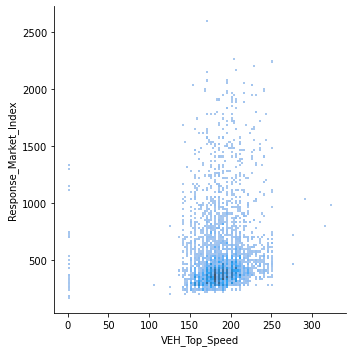

In [ ]:
sn.displot(df, x="VEH_Top_Speed", y="Response_Market_Index") # on remarque qu'il y a quelques outlyers en 0 que l'on va retirer

In [ ]:
df = df.drop(df.loc[df['VEH_Top_Speed'] == 0].index)

In [ ]:
df['BEH_Number_Year_Insured'].value_counts()

 10.0    3806
-1.0     1035
 7.0      982
 5.0      529
 2.0      419
 6.0      413
 8.0      363
 3.0      313
 4.0      305
 1.0      290
 9.0      249
 0.0      191
Name: BEH_Number_Year_Insured, dtype: int64

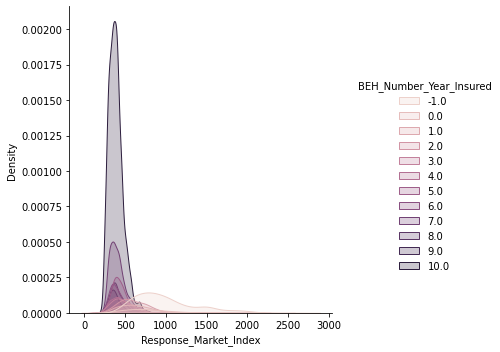

In [ ]:
sn.displot(df, x="Response_Market_Index", hue="BEH_Number_Year_Insured", kind="kde", fill=True)

<AxesSubplot:>

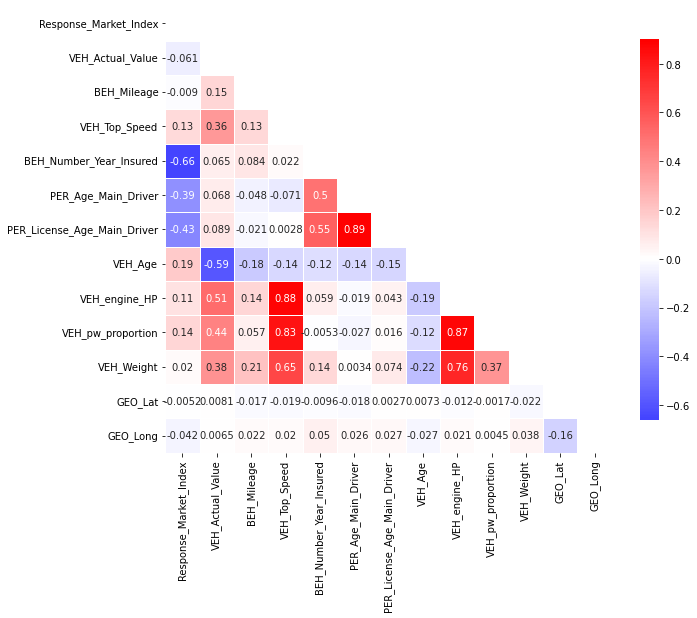

In [ ]:
corr = df.corr(method = 'pearson')
fig, ax = plt.subplots(figsize = (10,10))
mask = np.triu(np.ones_like(corr, dtype=bool)) #mask upper triangle
sn.heatmap(corr, mask=mask, vmax = 0.9, cmap='bwr', square = True, annot = True, linewidths=.5, cbar_kws={"shrink": .7}, center=0)

<AxesSubplot:xlabel='PER_KIDS_ON_BOARD_ID', ylabel='Response_Market_Index'>

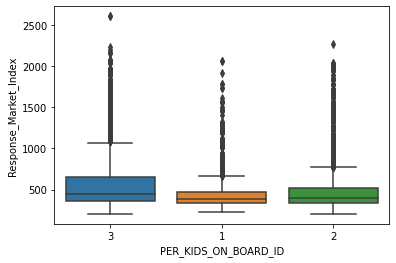

In [ ]:
sn.boxplot(x="PER_KIDS_ON_BOARD_ID", y="Response_Market_Index", data = df)	

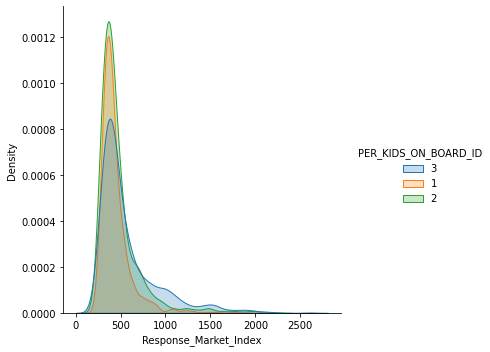

In [ ]:
sn.displot(df, x="Response_Market_Index", hue="PER_KIDS_ON_BOARD_ID", kind="kde", fill=True)

<AxesSubplot:xlabel='VEH_fuel_type', ylabel='Response_Market_Index'>

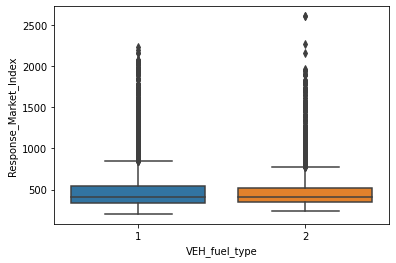

In [ ]:
sn.boxplot(x="VEH_fuel_type", y="Response_Market_Index", data = df)	

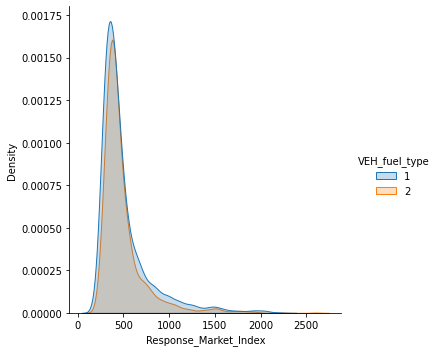

In [ ]:
sn.displot(df, x="Response_Market_Index", hue="VEH_fuel_type", kind="kde", fill=True)

<AxesSubplot:xlabel='VEH_Number_of_doors', ylabel='Response_Market_Index'>

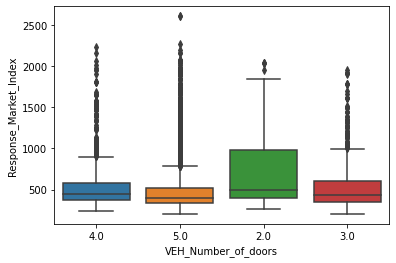

In [ ]:
sn.boxplot(x="VEH_Number_of_doors", y="Response_Market_Index", data = df)	

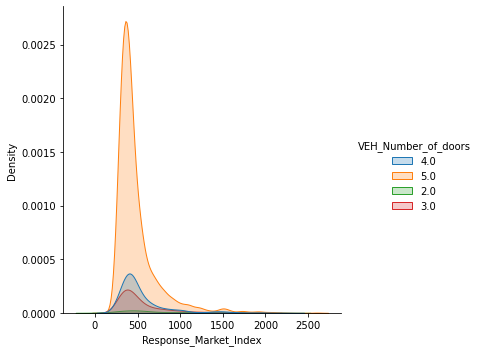

In [ ]:
sn.displot(df, x="Response_Market_Index", hue="VEH_Number_of_doors", kind="kde", fill=True)

<AxesSubplot:xlabel='PER_Insured_Before', ylabel='Response_Market_Index'>

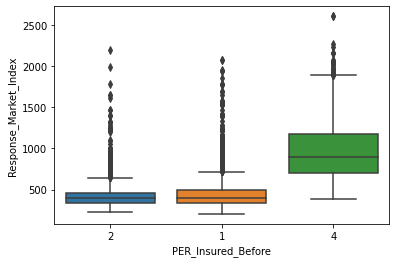

In [ ]:
sn.boxplot(x="PER_Insured_Before", y="Response_Market_Index", data = df)	

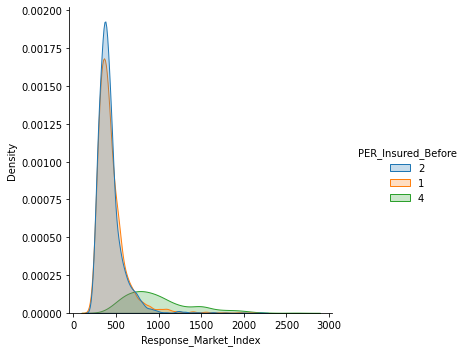

In [ ]:
sn.displot(df, x="Response_Market_Index", hue="PER_Insured_Before", kind="kde", fill=True)

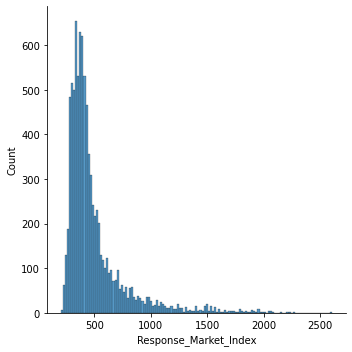

In [ ]:
sn.displot(df.Response_Market_Index)  # prix par an pour l'assurance auto   #distribution chi-2

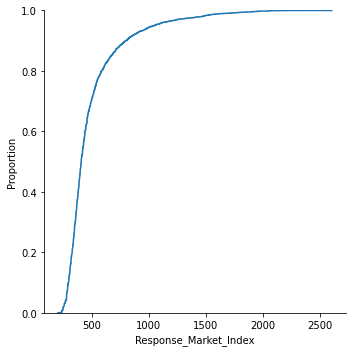

In [ ]:
sn.displot(df, x="Response_Market_Index", kind="ecdf")

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
import random

In [ ]:
X = df[[col for col in list(df.columns) if col != 'Response_Market_Index']] 
y = df.Response_Market_Index

In [ ]:
object_cols = df.select_dtypes(include=['object']).columns
cont_cols = df.select_dtypes(include=['float']).columns


In [ ]:
object_cols

Index(['PROD_Formula', 'PER_sex', 'PER_KIDS_ON_BOARD_ID',
       'VEH_Number_of_doors', 'VEH_TransmissionId', 'PER_Matrimonial_Status',
       'VEH_fuel_type', 'VEH_Drive_type', 'VEH_Body', 'VEH_Segment',
       'PER_Parking_Type', 'CLA_BM', 'VEH_High_Risk_Vehicle',
       'PER_previous_insurer', 'PER_Is_second_driver', 'PER_Insured_Before'],
      dtype='object')

In [ ]:
cont_cols

Index(['Response_Market_Index', 'VEH_Actual_Value', 'BEH_Mileage',
       'VEH_Top_Speed', 'BEH_Number_Year_Insured', 'PER_Age_Main_Driver',
       'PER_License_Age_Main_Driver', 'VEH_Age', 'VEH_engine_HP',
       'VEH_pw_proportion', 'VEH_Weight', 'GEO_Lat', 'GEO_Long'],
      dtype='object')

In [ ]:
object_cols_list = ['PROD_Formula', 'PER_sex', 'PER_KIDS_ON_BOARD_ID',
       'VEH_Number_of_doors', 'VEH_TransmissionId', 'PER_Matrimonial_Status',
       'VEH_fuel_type', 'VEH_Drive_type', 'VEH_Body',
       'VEH_Segment', 'PER_Parking_Type', 'CLA_BM', 'VEH_High_Risk_Vehicle',
       'PER_previous_insurer', 'PER_Is_second_driver', 'PER_Insured_Before']

cont_cols_list = ['VEH_Actual_Value', 'BEH_Mileage',
       'VEH_Top_Speed', 'BEH_Number_Year_Insured', 'PER_Age_Main_Driver',
       'PER_License_Age_Main_Driver', 'VEH_Age', 'VEH_engine_HP',
       'VEH_pw_proportion', 'VEH_Weight', 'GEO_Lat', 'GEO_Long']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [ ]:
rf = RandomForestRegressor(n_estimators=200, max_depth=19, min_samples_split=2, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=19, n_estimators=200, random_state=0)

In [ ]:
y_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)

mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
print(f"Mean absolute percentage error on train set: {mape_train:.2f}%")


mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Mean absolute percentage error on test set: {mape_test:.2f}%")

ape_train = np.abs((y_train - y_train_pred) / y_train) * 100
percentile = np.percentile(ape_train, q=20)
inv_percentile = 1 / percentile
print(f"Inverse percentile of APE at 20% level on train set: {inv_percentile:.2f}")

ape_test = np.abs((y_test - y_pred) / y_test) * 100
percentile = np.percentile(ape_test, q=20)
inv_percentile = 1 / percentile
print(f"Inverse percentile of APE at 20% level on test set: {inv_percentile:.2f}")

Mean absolute percentage error on train set: 3.89%
Mean absolute percentage error on test set: 8.78%
Inverse percentile of APE at 20% level on train set: 1.44
Inverse percentile of APE at 20% level on test set: 0.67


In [ ]:
sklearn.metrics.mean_squared_error(y_train, y_train_pred)

1193.2345181993471

In [ ]:
sklearn.metrics.mean_squared_error(y_test, y_pred)

9030.921237305341

In [ ]:
r2_score(y_train, y_train_pred)

0.9832933344928924

In [ ]:
r2_score(y_pred, y_test)

0.851350607736768

In [ ]:
mape = np.abs((y_test - y_pred) / y_test) * 100

df_y_pred = pd.DataFrame(data=y_pred, columns=['y_pred'])
df_y_test = pd.DataFrame(data=list(y_test), columns=['y_test'])
df_mape = pd.DataFrame(data=list(mape), columns=['mape'])
df_error = pd.concat([df_y_pred, df_y_test, df_mape], axis=1)
df_error     

,y_pred,y_test,mape
0,845.531606,1097.36,22.948567
1,357.845161,337.00,6.185508
2,523.372992,535.00,2.173273
3,452.069194,439.00,2.977037
4,960.230705,1009.00,4.833429
...,...,...,...
2931,367.956659,357.25,2.996966
2932,1475.311092,2604.93,43.364655
2933,1230.577800,1236.00,0.438689
2934,567.211079,579.00,2.036083


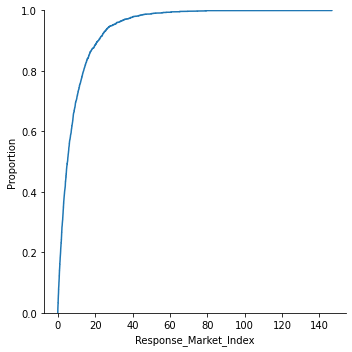

In [ ]:
sn.displot(mape, kind="ecdf")

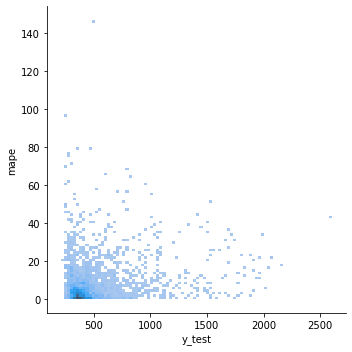

In [ ]:
sn.displot(df_error, x="y_test", y="mape")

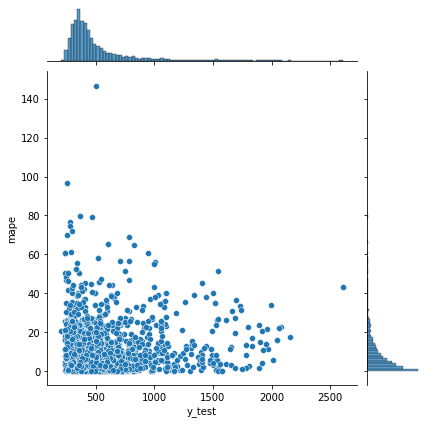

In [ ]:
sn.jointplot(data=df_error, x="y_test", y="mape")

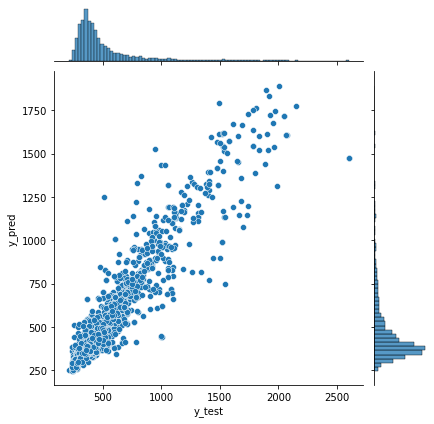

In [ ]:
sn.jointplot(data=df_error, x="y_test", y="y_pred")

J'ai essayé de réduire le nombre de features pour combattre l'overfitting mais j'ai de moins bonnes performances

#Interpretability

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap

In [ ]:
shap.initjs()

# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

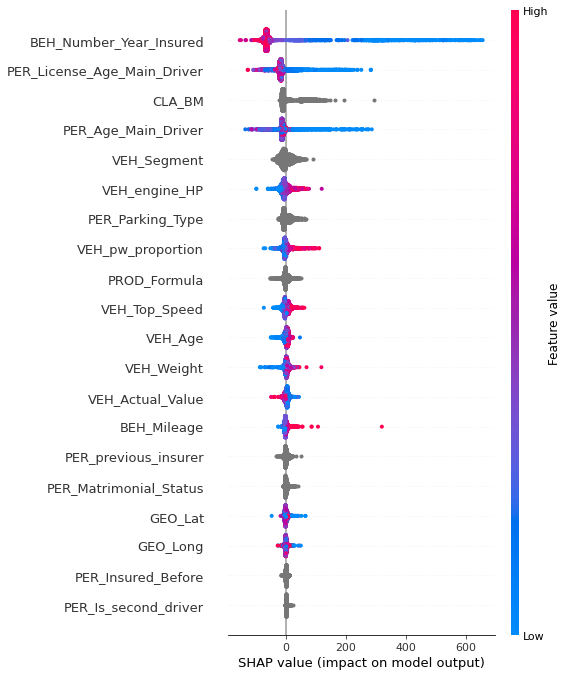

In [ ]:
shap.summary_plot(shap_values, X_test)

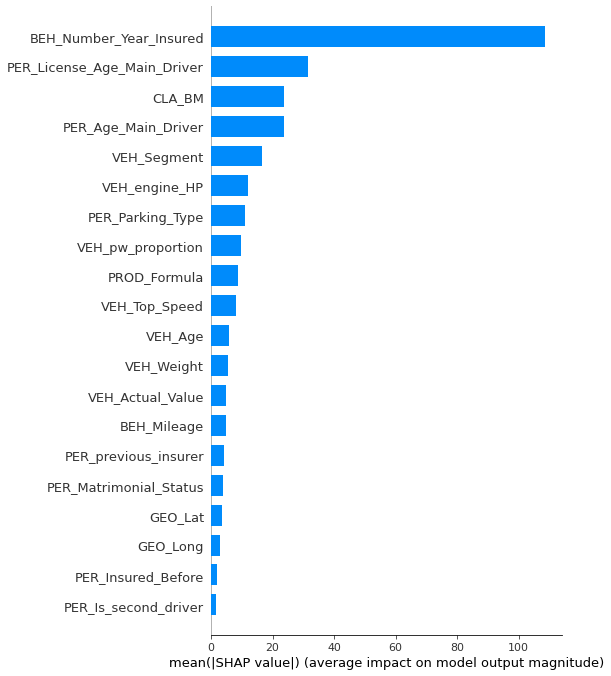

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

With the help of these graphics, we can see that the number of years insured has the biggest impact on our model and the prediction of insurance prices. The value -1 (which we can assume represents never being insured previously) has a strong positive impact on the insurance price.

Furthermore, the age of the main driver also has a significant impact, particularly the value 48, which greatly decreases the auto insurance price (which makes sense).